In [19]:
from utils import read_file_by_line
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
DATA_PATH = '../dataset/train_all.txt'

In [15]:
data = read_file_by_line(DATA_PATH)
len(data)

552523

In [58]:
data = pd.read_csv(DATA_PATH, sep='\t', names=['query1','query2','label'])

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
def stand_label(x):
    if x =='0' or x == '1':
        return int(x)
    elif x == 0 or x == 1:
        return x
    else:
        return 'UNKNOWN'

In [60]:
data['label'] = data['label'].apply(stand_label)
data['label'].unique()

array([0, 1, 'UNKNOWN'], dtype=object)

In [61]:
data.loc[data['label'] == 'UNKNOWN']

,query1,query2,label
45690,我还不是你们的客户，怎样才能成为你们的客户呢\t开通我啊\t1\n更改了电话号码\t更改联系...,0,UNKNOWN
49034,什么时候到账呀 还没到账呢 人工电话多少,什么时间我可以开通\t0\n变更电话\t更改手机\t1\n降低微粒贷额度\t微贷额度下降为什...,UNKNOWN
82390,为什么我没有微粒贷 什么时候开通呢,什么时间我可以开通\t1\n逾期影响信用吗？\t逾期的具体计算方式\t0\n“钱没到帐”\t...,UNKNOWN
93366,30分钟了，我还没有收到贷,什么时间我可以开通\t0\n不可以从微信钱包里扣吗\t你好我想问一下还款能不能直接从钱包里扣...,UNKNOWN
98152,不知道，什么时候会邀请我,我还不是你们的客户，怎样才能成为你们的客户呢\t0\n更改手机号码怎么办？\t请问怎样更改之...,UNKNOWN
108720,我还不是你们的客户，怎样才能成为你们的客户呢\t开通问题\t1\n你好！怎么扣不了款\t你好...,1,UNKNOWN


In [62]:
def handle_wrong_text(rows, data):
    right_row = []
    for row in rows:
        right_row.extend(data.iloc[row]['query1'].split('\n'))
        right_row.extend(data.iloc[row]['query2'].split('\n'))
    right_series = []
    for row in right_row:  
        tmp = row.split('\t')
        if len(tmp)  == 3:
            right_series.append({'query1':tmp[0], 'query2': tmp[1], 'label': int(tmp[2])})
    data = data.append(right_series, ignore_index=True)
    return data

In [63]:
data = handle_wrong_text([45690,49034,82390,93366,98152,108720],data)

In [67]:
data = data.drop([45690,49034,82390,93366,98152,108720])

In [71]:
data['label'].unique()

array([0, 1])

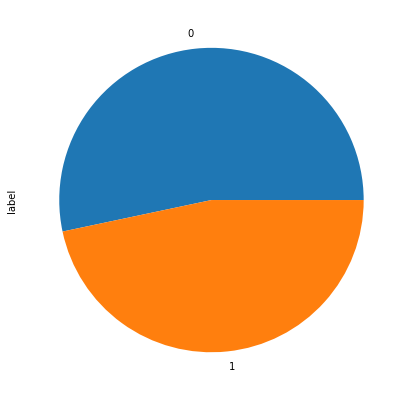

In [72]:
plt.figure(figsize=[9,7])
data['label'].value_counts().plot.pie()
plt.show()

In [73]:
data.shape

(544149, 3)

In [76]:
data['query1_len'] = data['query1'].str.len()
data['query2_len'] = data['query2'].str.len()

In [100]:
data['query1_len'].describe()

count    542510.000000
mean         10.280338
std          79.421021
min           3.000000
25%           7.000000
50%           9.000000
75%          12.000000
max       47383.000000
Name: query1_len, dtype: float64

In [98]:
data = data.drop(data.loc[(data['query2_len']< 3 )| (data['query1_len'] < 3)].index)

In [88]:
TEST_PATH = '../dataset/test_A'
test = read_file_by_line(TEST_PATH)
test = pd.read_csv(TEST_PATH, sep='\t', names=['query1','query2','label'])

In [90]:
test['query1_len'] = test['query1'].str.len()
test['query2_len'] = test['query2'].str.len()

In [94]:
test['query2_len'].describe()

count    50000.00000
mean         8.51236
std          3.09696
min          3.00000
25%          6.00000
50%          8.00000
75%         10.00000
max         48.00000
Name: query2_len, dtype: float64

In [120]:
cnt = data['query1'].value_counts().to_dict()
cnt2 = data['query2'].value_counts().to_dict()
cnt.update(cnt2)
cnt

{'今天的天气很好哦': 164,
 '你的照片呢': 10,
 '你给我唱一首歌呗': 21,
 '你知道什么音乐': 23,
 '今天天气不错': 11,
 '你会唱什么歌': 12,
 '乳腺癌早期有可能有哪些症状': 65,
 '有艾滋病可以做爱吗': 64,
 '乳腺增生会引起乳腺癌吗': 61,
 '你那的天气怎么样': 18,
 '艾滋病会传染吗': 52,
 '乳腺癌前期有什么症状': 1,
 '开通微粒贷': 41,
 '手淫自慰是否会感染艾滋病': 50,
 '口交感染艾滋病的几率是多少': 47,
 '借款取消': 22,
 '小影唱首歌给我听': 14,
 '你唱一首歌给我听': 5,
 '你唱歌很好听': 2,
 '乳房有肿块是不是乳腺癌': 1,
 '乳腺癌一定要切除乳房么': 44,
 '乳腺癌晚期有什么症状': 2,
 '早期乳腺癌会有哪些不适': 43,
 '乳腺癌晚期还能活多久呢': 42,
 '乳腺癌骨转移全身疼痛怎么办': 42,
 '乳腺癌转移扩散还能活多久': 42,
 '带安全套和朋友做爱性交会感染艾滋病吗': 41,
 '乳腺癌晚期怎么办': 41,
 '乳腺癌骨转移治疗方法': 1,
 '乳腺癌会死吗': 1,
 '说英语啦': 232,
 '唱首歌吧': 20,
 '乳腺癌严重吗': 1,
 '艾滋病可以通过口交传染吗': 1,
 '请你帮我': 10,
 '什么都没有': 1,
 '你刚发的这个': 2,
 '肛交会传染艾滋病吗': 1,
 '今天天气真好': 11,
 '如果口腔有溃疡艾滋病会通过接吻传染吗': 36,
 '你早上起床了吗': 7,
 '乳房有硬块是不是乳腺癌': 1,
 '艾滋病跟尖锐湿疣、梅毒有联系么': 36,
 '你有微信吗': 3,
 '艾滋病主要通过什么途径传播': 35,
 '你的电话是多少': 4,
 '男人会得乳腺癌吗': 35,
 '这样会感染hiv吗': 35,
 '我想听你唱歌': 13,
 '艾滋病会不会通过蚊子传播': 34,
 '4:怎么计息': 24,
 '什么都不是': 24,
 '得了艾滋病的人一般能活多久': 34,
 '如何计息': 6,
 '尖锐湿疣会引发艾滋病吗': 33,
 '乳腺癌术后还需要化疗吗': 33,
 '乳腺增生和乳腺癌有什么区别': 1

In [128]:
data.loc[data['query1'] == '借款取消','query2'].to_list()

['借款了怎么取消',
 '为什么借款撤销了',
 '取消借款怎么操作',
 '这个贷款业务能不能现在直接取消？？？',
 '我还没借，但我想取消借款权限，防被他人借去',
 '借款后总是申请撤销，借款失败',
 '未看到申请成功，可以取消借款吗？',
 '等待电话中可以取消了借款吗',
 '你好，取消借款',
 '不要借了',
 '借款确认电话没接到是否可以取消借款',
 '怎么才可以把借款申请取消？',
 '借款怎么样才能取消',
 '我可以取消借贷',
 '能不能取消此次借款？',
 '不好意思，好玩。不需借款。请取消',
 '取消借款怎么手续',
 '取消借款。太慢了。',
 '借款审核中怎么取消',
 '刚刚提交的贷款申请可以取消吗？',
 '我不小心点了借款，怎么取消借款',
 '不可以取消借款吗',
 '借款多久没打电话取消',
 '不借了行不行',
 '可以退么',
 '可否取消借款',
 '取消借款申请算了',
 '帮我把借款取消',
 '借款没申请成功可以取消吗',
 '我是赖勇夫，取消借款，取消！',
 '不贷款。按错了。取消申请',
 '取消刚才借款',
 '已申请的借款如何取消',
 '你好，请问怎么取消借款',
 '借钱了，在等电话审核中，可以取消吗',
 '取消刚才的借款',
 '取消申请成功未放贷的贷款',
 '不用借了。谢谢',
 '不借了，怎麼退',
 '现在能否取消贷款？',
 '怎样取消借款，卡号是原来的，没有用了换一张自己的卡',
 '不需要借了，试试功能的',
 '我说取消借款申请',
 '怎么退',
 '审核电话一直没打来，可以取消贷款吗',
 '不想借了，怎么退',
 '我刚弄错了，我想取消借款，怎么弄']

In [129]:
from collections import defaultdict
cnt_dict = defaultdict(dict)
for text in cnt:
    if(cnt[text] > 1):
        if not cnt_dict[text]:
            cnt_dict[text]['match'] = data.loc[(data['query1'] == text) & (data['label'] == 1),'query2'].to_list()
            cnt_dict[text]['neg_match'] = data.loc[(data['query2'] == text) & (data['label'] == 0),'query2'].to_list()
cnt_dict

KeyboardInterrupt: 